In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [114]:
def cv2_to_pltimshow(img):
    img = img / 255.0
    
    if img.shape[2] == 3:
        b = img[:, :, 0]
        g = img[:, :, 1]
        r = img[:, :, 2]
        dst = np.zeros_like(img)
    dst[:, :, 0] = r
    dst[:, :, 1] = g
    dst[:, :, 2] = b
    
    dst = dst * 255
    dst = dst.astype(np.uint8)
    
    return dst

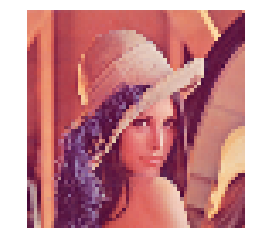

In [115]:
src = cv2.imread("./input_images/lena.jpg")
src = cv2.resize(src, (64, 64))
plt.imshow(cv2_to_pltimshow(src))
plt.axis('off')
plt.show()

In [152]:
# clahe を設定
cl_size = 8
clahe = [cv2.createCLAHE(clipLimit=0.0, tileGridSize = (cl_size, cl_size)),
         cv2.createCLAHE(clipLimit=2.0, tileGridSize = (cl_size, cl_size)),
         cv2.createCLAHE(clipLimit=20.0, tileGridSize = (cl_size, cl_size))]

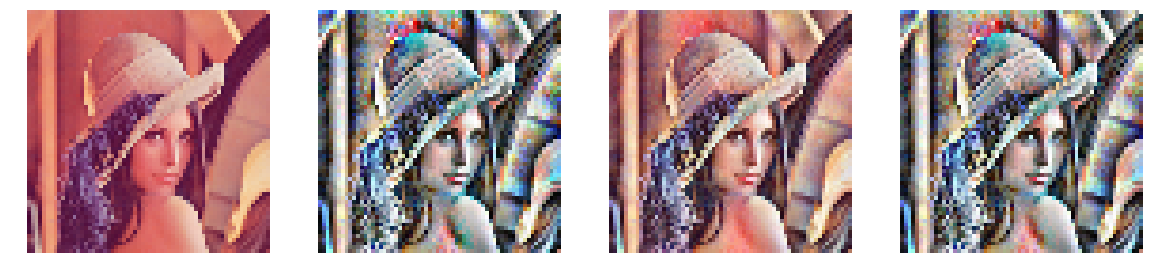

In [153]:
cl_img = [np.copy(src), np.copy(src), np.copy(src)]
for iter in range(len(clahe)):
    for c in range(3):
        cl_img[iter][:, :, c] = clahe[iter].apply(src[:, :, c])
        
figure = plt.figure(figsize=(20, 20))
axes = []

axes.append(figure.add_subplot(1, len(clahe)+1, 1))
axes[0].imshow(cv2_to_pltimshow(src))
axes[0].axis('off')

for iter in range(len(clahe)):
    axes.append(figure.add_subplot(1, len(clahe)+1, iter+2))
    axes[iter+1].imshow(cv2_to_pltimshow(cl_img[iter]))
    axes[iter+1].axis("off")

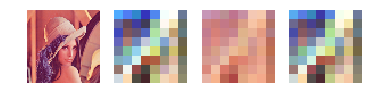

In [154]:
area = [np.copy(cl_img[0][:cl_size, :cl_size, :]),
        np.copy(cl_img[1][:cl_size, :cl_size, :]),
        np.copy(cl_img[2][:cl_size, :cl_size, :])]

figure = plt.figure()
axes = []

axes.append(figure.add_subplot(1, len(clahe)+1, 1))
axes[0].imshow(cv2_to_pltimshow(src))
axes[0].axis('off')

for iter in range(len(clahe)):
    axes.append(figure.add_subplot(1, len(clahe)+1, iter+2))
    axes[iter+1].imshow(cv2_to_pltimshow(area[iter]))
    axes[iter+1].axis("off")

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


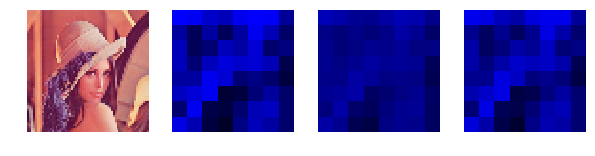

In [155]:
# 青だけにclaheを適用
src_blue = np.zeros_like((src))
src_blue[:, :, 0] = np.copy(src[:, :, 0])
area_blue = np.zeros_like(area)

fig = plt.figure(figsize=(10, 10))
axes = []
axes.append(fig.add_subplot(1, len(clahe)+1, 1))
axes[0].imshow(cv2_to_pltimshow(src))
axes[0].axis('off')

for iter in range(len(clahe)):
    area_blue[iter][:, :, 0] = area[iter][:, :, 0]
    axes.append(fig.add_subplot(1, len(clahe)+1, iter+2))
    axes[iter+1].imshow((cv2_to_pltimshow(area_blue[iter])))
    axes[iter+1].axis("off")
    
figure.show()

[ 83  83  85  85  86  86  87  89  94 100 101 102 103 104 104 106 106 106
 106 106 106 106 107 107 108 108 108 108 108 109 109 109 109 109 109 109
 109 109 109 109 110 111 111 111 111 111 111 112 112 112 112 113 113 114
 114 115 115 115 115 115 117 118 120 123]


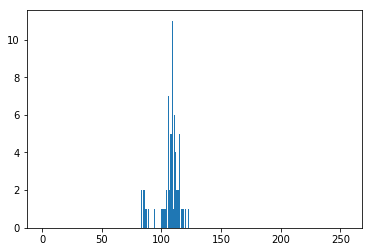

[ 41  53  63  63  64  65  72  76  88  88  88 104 105 108 109 109 109 110
 110 116 116 116 118 126 130 133 151 158 159 159 159 159 159 161 163 176
 181 183 183 185 187 187 187 187 187 191 191 203 203 210 210 211 214 219
 226 239 239 240 241 241 243 249 252 255]


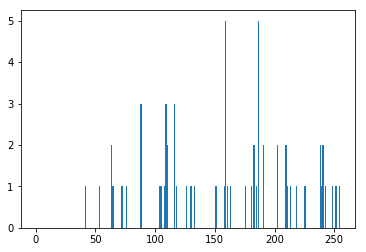

[ 68  80  80  89  92  96  97  98  98 102 104 113 120 120 120 124 124 128
 129 129 130 130 131 131 131 135 135 135 135 135 136 139 139 139 140 142
 142 143 143 143 143 143 143 144 144 144 146 147 147 150 150 151 153 159
 163 163 164 164 165 166 167 173 180 183]


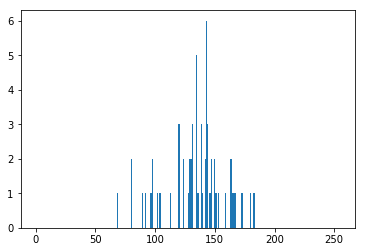

[ 48  67  68  74  75  79  83  84  96  96  96 111 111 113 113 116 116 119
 119 124 124 124 124 133 135 139 143 143 143 143 143 147 153 161 163 166
 167 167 167 167 167 169 169 169 174 176 180 187 187 194 194 195 200 203
 216 223 223 226 226 227 229 235 236 239]


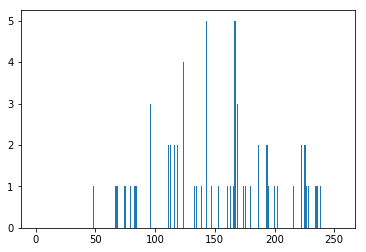

In [156]:
# ヒストグラムを表示
print(np.sort(src[:, :, 0][:area[0].shape[0], :area[0].shape[1]].flatten()))
plt.hist(src[:, :, 0][:area[0].shape[0], :area[0].shape[1]].flatten(), bins=256, range=(0, 255))
plt.show()

for iter in range(len(clahe)):
    print(np.sort(area_blue[iter][:, :, 0].flatten()))
    plt.hist(area_blue[iter][:, :, 0].flatten(), bins=256, range=(0, 255))
    plt.show()

[  0   0   8   8  16  16  21  25  29  33  37  41  45  53  53  82  82  82
  82  82  82  82  90  90 111 111 111 111 111 156 156 156 156 156 156 156
 156 156 156 156 160 185 185 185 185 185 185 202 202 202 202 210 210 218
 218 239 239 239 239 239 243 247 251 255]


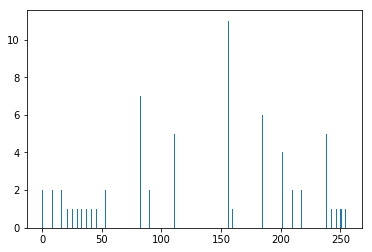

In [157]:
# 通常のヒストグラム平坦化を8x8の部分の青チャンネルに適用 -> clipLimit=0と同じになる？
equ = cv2.equalizeHist(src[:, :, 0][:cl_size, :cl_size])
print(np.sort(equ.flatten()))
plt.hist(equ.flatten(), bins=256, range=(0, 255))
plt.show()